In [1]:
#import Lib/Packages
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('spam.csv', names = ['label','message','v1','v2','v3'])
dataset.pop('v1')
dataset.pop('v2')
dataset.pop('v3')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: v3, Length: 5572, dtype: object

In [3]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset['label'] = dataset['label'].map({'ham':0,'spam':1})

In [8]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline

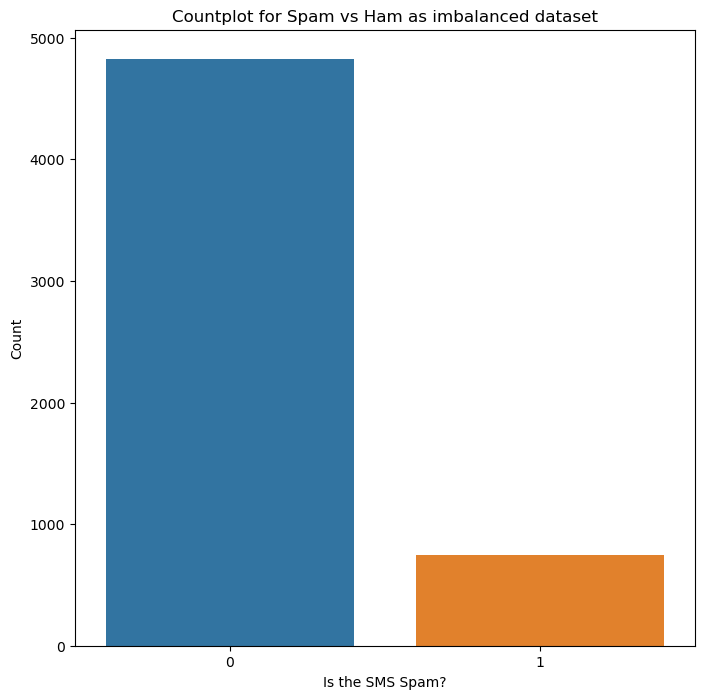

In [10]:
#Countplot for Spam vs Ham as imbalanced dataset
plt.figure(figsize = (8,8))
p = sns.countplot(x = 'label', data = dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [11]:
#Handling imbalanced dataset using oversampling
only_spam = dataset[dataset['label'] == 1]

In [12]:
print("Number of Spam SMS: ", len(dataset))
print("Number of Ham SMS: ", len(dataset) - len(only_spam))

Number of Spam SMS:  5572
Number of Ham SMS:  4825


In [13]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [14]:
count

6

In [15]:
for i in range(0,count-1):
    dataset =  pd.concat([dataset, only_spam])

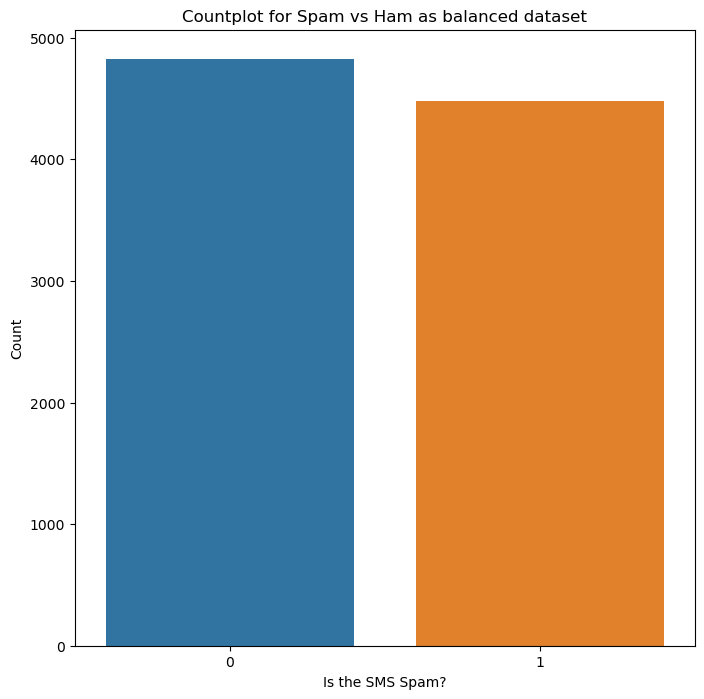

In [16]:
#Countplot for Spam vs Ham as balanced dataset
plt.figure(figsize = (8,8))
p = sns.countplot(x = 'label', data = dataset)
p = plt.title('Countplot for Spam vs Ham as balanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [17]:
#creating new feature word_count
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [18]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


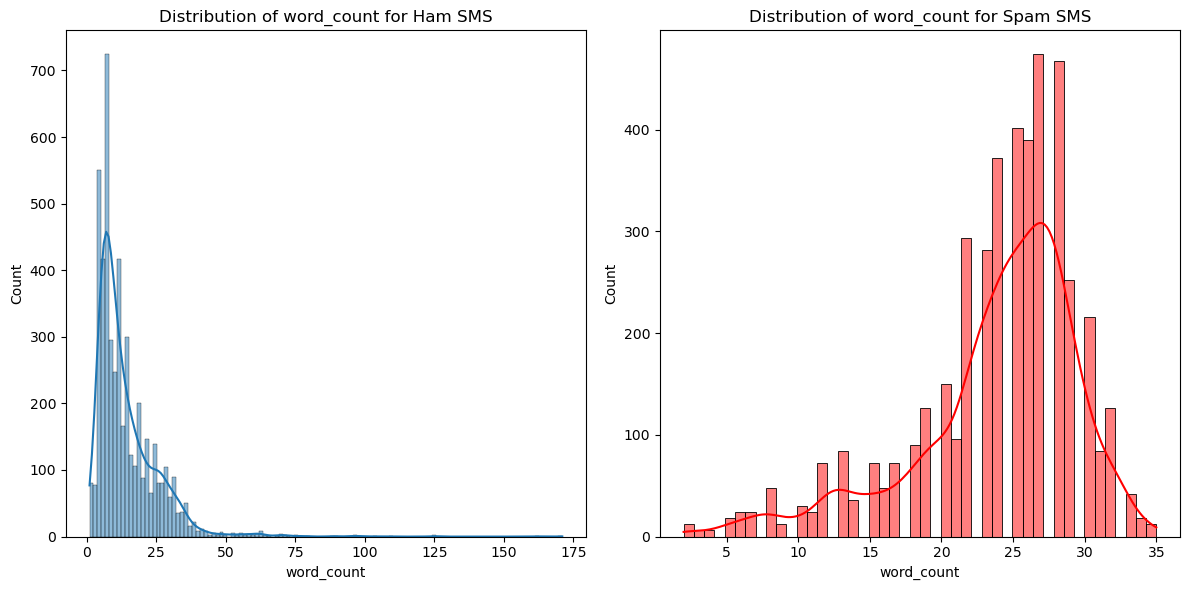

In [19]:
plt.figure(figsize=(12,6))

#(1,1)
plt.subplot(1,2,1)
p = sns.histplot(dataset[dataset["label"] == 0].word_count, kde=True)
p = plt.title("Distribution of word_count for Ham SMS")

#(1,2)
plt.subplot(1,2,2)
p = sns.histplot(dataset[dataset["label"] == 1].word_count, color = "red", kde=True)
p = plt.title("Distribution of word_count for Spam SMS")

plt.tight_layout()
plt.show()

In [20]:
#Creating new feature of containing currency symbol
def currency_present(data):
    currency_symbols = ['€','$','¥',' £','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [21]:
dataset["contains_currency_symbols"] =  dataset["message"].apply(currency_present)

In [22]:
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


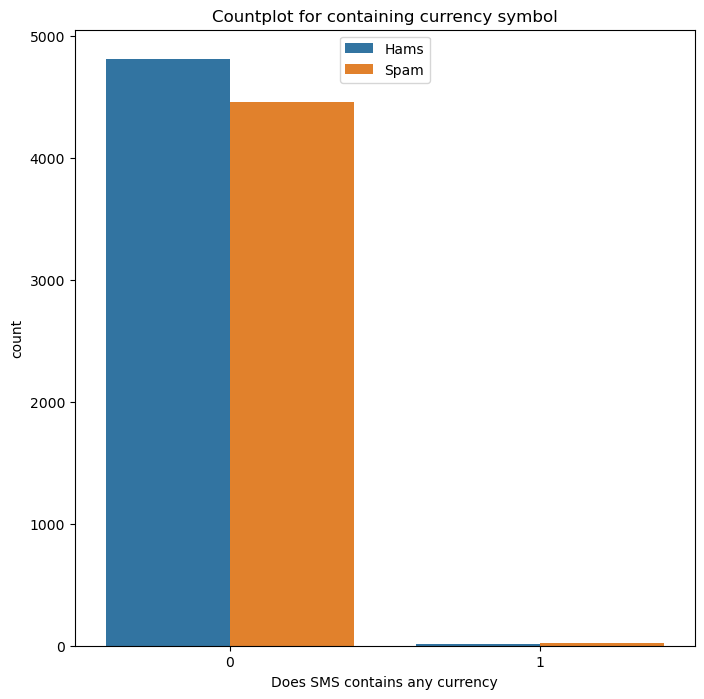

In [23]:
#Countplot for contains_currency_symbols
plt.figure(figsize = (8,8))
p =  sns.countplot(x = 'contains_currency_symbols',data = dataset, hue = 'label') 
p = plt.title('Countplot for containing currency symbol')
p = plt.xlabel('Does SMS contains any currency')
p = plt.ylabel('count')
p = plt.legend(labels = ['Hams', 'Spam'], loc = 9)

In [24]:
#creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:
            return 1
    return 0

In [25]:
dataset["cotains_number"] = dataset['message'].apply(number)

In [26]:
dataset

,label,message,word_count,contains_currency_symbols,cotains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


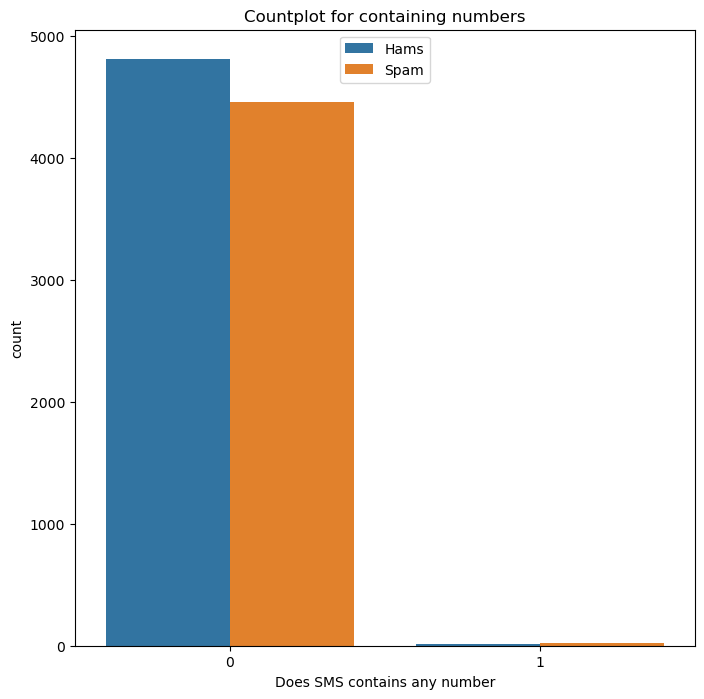

In [27]:
#Countplot for containing numbers
plt.figure(figsize = (8,8))
p =  sns.countplot(x = 'contains_currency_symbols',data = dataset, hue = 'label') 
p = plt.title('Countplot for containing numbers')
p = plt.xlabel('Does SMS contains any number')
p = plt.ylabel('count')
p = plt.legend(labels = ['Hams', 'Spam'], loc = 9)

In [28]:
#Data cleaning
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [29]:
corpus = []
wnl = WordNetLemmatizer()
for sms in list(dataset.message):
    message = re.sub(pattern = '{a-zA-Z}',repl = ' ',string = sms) #filtering out special characters and numbers
    message = message.lower()
    words = message.split() #Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    corpus.append(message)

In [30]:
corpus

['go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say early hor... u c already say...',
 'nah think go usf, life around though',
 "freemsg hey darling 3 week's word back! i'd like fun still? tb ok! xxx std chgs send, å£1.50 rcv",
 'even brother like speak me. treat like aid patent.',
 "per request 'melle melle (oru minnaminunginte nurungu vettam)' set callertune callers. press *9 copy friend callertune",
 'winner!! valued network customer selected receivea å£900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'mobile 11 month more? u r entitled update latest colour mobile camera free! call mobile update co free 08002986030',
 "i'm gonna home soon want talk stuff anymore tonight, k? i've cried enough today.",
 'six chance win 

In [31]:
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [32]:
X = pd.DataFrame(vectors, columns = feature_names)
Y = dataset['label']

In [33]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [36]:
#naive bayes model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, Y, scoring = 'f1', cv = 10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))

0.951
0.005


In [37]:
mnb.fit(X_train, Y_train)
Y_pred = mnb.predict(X_test)

In [38]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       958
           1       0.95      0.96      0.95       904

    accuracy                           0.96      1862
   macro avg       0.96      0.96      0.96      1862
weighted avg       0.96      0.96      0.96      1862



In [39]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[916,  42],
       [ 40, 864]], dtype=int64)

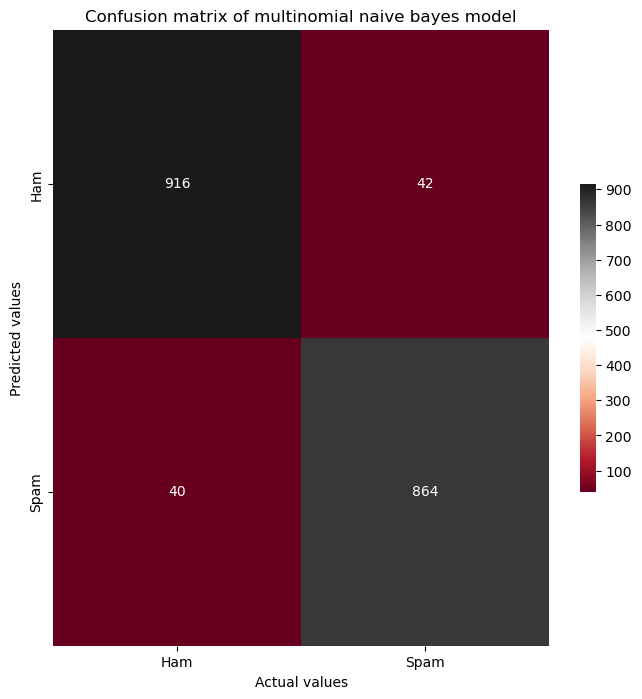

In [40]:
plt.figure(figsize = (8,8))
axis_labels = ['Ham', 'Spam']
p = sns.heatmap(data = cm, xticklabels = axis_labels, yticklabels= axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink": 0.5}, cmap = "RdGy")
p = plt.title("Confusion matrix of multinomial naive bayes model") 
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")

In [56]:
import warnings
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
cv1 = cross_val_score(dt, X, Y, scoring = 'f1', cv = 10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))

0.951
0.005


In [57]:
dt.fit(X_train, Y_train)
Y_pred1 = dt.predict(X_test)

In [58]:
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       958
           1       0.96      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [59]:
cm = confusion_matrix(Y_test, Y_pred1)
cm

array([[922,  36],
       [  3, 901]], dtype=int64)

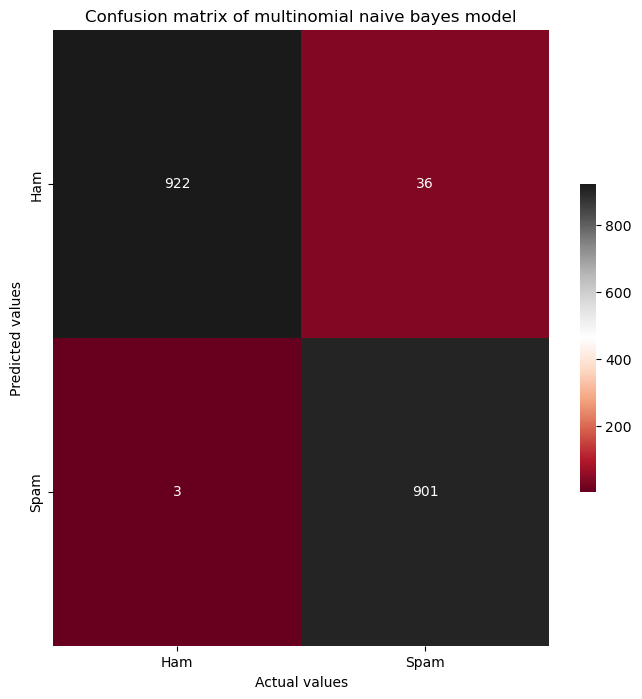

In [60]:
plt.figure(figsize = (8,8))
axis_labels = ['Ham', 'Spam']
p = sns.heatmap(data = cm, xticklabels = axis_labels, yticklabels= axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink": 0.5}, cmap = "RdGy")
p = plt.title("Confusion matrix of multinomial naive bayes model") 
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")

In [61]:

def predict_spam(sms):
    message = re.sub(pattern = '[^-a-zA-Z]',repl = ' ',string = sms) #filtering out special characters and numbers
    message = message.lower()
    words = message.split() #Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray() 
    return dt.predict(temp)

In [62]:
#predicting messages1 (spam)
sample_message = "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"
if predict_spam(sample_message):
    print("This is a SPAM message.")
else:
    print("This is a HAM(normal) message")

This is a SPAM message.


In [63]:
#predicting messages2 (ham)
sample_message = "U horrible gal... U knew dat i was going out wif him yest n u still come n ask me..."
if predict_spam(sample_message):
    print("This is a SPAM message.")
else:
    print("This is a HAM(normal) message")

This is a HAM(normal) message
